In [2]:
import seaborn as sns
from sklearn.model_selection import cross_val_score
import pandas as pd
%matplotlib inline
#load data
df = pd.read_csv("With_start_time.csv")
df

In C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\prana\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

,Round_name,Run_id,Vid,Start_edge,destination,Route,start_time,Est_travel_time,#_Sharing_route,#_of_edges,Route_length,Travel_time
0,analyze0,STRBE_Collector,2,318908683#0,422688976#1,"['318908683#0', '229169572#1', '229169572#5', ...",0.0,33.164147,194,6,850.24,111.0
1,analyze0,STRBE_Collector,3,422685671#2,-105681660#20,"['422685671#2', '422685679#0', '229169572#1', ...",0.2,73.550499,202,7,1734.24,115.0
2,analyze0,STRBE_Collector,4,318908683#0,-597602756#0,"['318908683#0', '229169572#1', '229169572#5', ...",0.4,59.909234,236,8,1300.17,114.0
3,analyze0,STRBE_Collector,5,422685671#2,422688976#1,"['422685671#2', '422685679#0', '229169572#1', ...",0.6,43.937725,194,7,1220.59,109.0
4,analyze0,STRBE_Collector,6,318908683#0,918280984,"['318908683#0', '229169572#1', '229169572#5', ...",0.8,25.357451,192,6,594.65,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9740,analyze24,STRBE_Collector,476,597602756#0,422688976#1,"['597602756#0', '597602756#1', '597602756#2', ...",94.8,87.907677,230,14,1952.30,756.0
9741,analyze24,STRBE_Collector,477,105681660#12,-597602753#1,"['105681660#12', '-597602753#13', '-597602753#...",95.0,61.151665,131,5,1358.79,355.0
9742,analyze24,STRBE_Collector,478,105681660#12,-318908683#1,"['105681660#12', '961870460', '-597602756#9', ...",95.2,85.218056,225,11,1703.70,861.0
9743,analyze24,STRBE_Collector,479,918280985,-105681660#20,"['918280985', '261136891#3', '-15382203#1', '9...",95.4,71.510849,148,6,1295.49,100.0


<AxesSubplot:xlabel='Travel_time'>

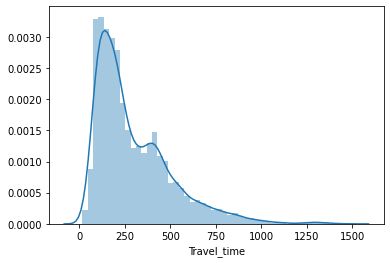

In [3]:
#drop empty data points
df.dropna(inplace=True)
#checking travel time distribution
sns.distplot(df['Travel_time'])

# Train Test Split

In [66]:
from sklearn.model_selection import train_test_split
X = df[['start_time','Est_travel_time','#_Sharing_route',"Route_length"]]
y = df[['Travel_time']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Linear Ridge Model 

In [42]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [43]:
reg.coef_

array([[ 2.21274392, -3.22345255,  0.49941241,  0.26950292]])

In [44]:
reg.intercept_

array([-28.67558381])

In [45]:
#shows overall fit of model... not that good for this model
reg.score(X_test, y_test)

0.20483115383254935

# Linear Lasso

In [46]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
reg.coef_

array([ 2.21256546, -3.22241543,  0.4994358 ,  0.26945111])

In [48]:
reg.intercept_

array([-28.66668908])

In [49]:
#hows overall fit of model... not that good for this model
reg.score(X_test, y_test)

0.20483065505937004

In [50]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1, normalize=False)
reg.fit(X_train,y_train)

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=False, positive=False,
          precompute='auto', verbose=False)

In [51]:
reg.coef_

array([ 2.21256626, -3.22243232,  0.4994338 ,  0.26945203])

In [52]:
reg.intercept_

array([-28.66661291])

In [53]:
#shows overall fit of model... not that good for this model
reg.score(X_test, y_test)

0.20483064546238017

#  Linear Bayesian Ridge

In [54]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [55]:
reg.coef_

array([ 2.20676178, -3.17933667,  0.50208622,  0.26724167])

In [56]:
reg.intercept_

-28.52283911147913

In [57]:
#shows overall fit of model... not that good for this model
reg.score(X_test, y_test)

0.20482084298523862

In [58]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
regr.predict(X_test)

array([229.77816778, 230.69679634, 230.61958008, ..., 230.69682442,
       230.69702791, 230.5625734 ])

In [60]:
#shows overall fit of model... terrible, worst performance so far
regr.score(X_test,y_test)

-0.09374800024525598

# Elastic Net

In [1]:
from sklearn.linear_model import ElasticNet

In [62]:
#NOTE: I WAS NOT ABLE TO SCORE THIS MODEL BUT I DO NOT BELIEVE IT WAS THAT GOOD BECAUSE OF WEAK CORRELATION AND INTERCEPT 
regr = ElasticNet(random_state=0)
regr.fit(X, y)
ElasticNet(random_state=0)
print(regr.coef_)
print(regr.intercept_)

[[ 2.06064467e+00 -2.98517752e+00 -1.26178393e+00 -0.00000000e+00
   2.14675889e+00 -1.04506456e+00  0.00000000e+00  5.47007290e+00
   3.55027672e+00  2.78070271e-01  9.76774087e-01  0.00000000e+00
   0.00000000e+00 -2.38589616e+00 -1.54089393e+01  1.53470014e+00
   5.17719990e+00  0.00000000e+00 -9.79952050e-01  3.11537903e+00
  -5.53634054e+00 -2.10656642e+00 -0.00000000e+00  3.89766821e+00
  -4.39541765e-01 -1.53213175e+00  4.94244581e+00 -6.51382318e-01
  -4.67112631e-01  8.04378936e+00 -7.28871098e+00  1.60314422e+00
   2.24403355e+00 -0.00000000e+00 -8.98685082e+00  9.33893958e+00
   3.28734142e+00  9.31805823e-01  6.33617087e+00  0.00000000e+00
  -1.48111101e+00  3.95414165e+00  0.00000000e+00  3.97700273e+00
   1.89203835e+00 -2.27864252e+00 -6.85598238e+00 -7.36504640e+00
  -5.28629929e-01  1.81015776e-01  5.00692433e+00 -5.19980890e+00
   0.00000000e+00  5.53612074e-01  3.35151376e+00 -6.00704729e-01
   7.29059797e-01  9.25783202e-01 -7.43609107e+00 -2.28687705e-01
   8.97840

# KNN REGRESSION

In [15]:
#CHECKING BEST PARAMETERS TO IMPROVE KNN
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 6}

In [40]:
knn = neighbors.KNeighborsRegressor(n_neighbors= 6)
knn.fit(X_train,y_train)
#STRONGEST SCORING SO FAR
knn.score(X_test,y_test)

0.628870661886234

# Gaussian Process Regressor 

In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF
import matplotlib.pyplot as plt
import numpy as np

In [63]:
kernel = RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel)

# Fit GPR model
gpr.fit(X_train, y_train)

# Predict mean
y_hat, y_sigma = gpr.predict(X_test, return_std=True)

# Squeeze data
x = np.squeeze(X)
y = np.squeeze(y)
x_test = np.squeeze(X_test)
y_test = np.squeeze(y_test)

#TERRIBLE DONT USE THIS 
gpr.score(X_test, y_test)

-1.705271319790063

# Gaussian Process Regressor

In [23]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=2)
pls2.fit(X_train, y_train)
PLSRegression()
Y_pred = pls2.predict(X_test)
#NOT GOOD MODEL AT ALL, VERY WEAK R^2 VALUE
pls2.score(X_test,y_test)

0.18141402702319764

# DECISION TREE 

In [24]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
#VERY STRONG, CAN BE BETTER THAN KNN
clf.score(X_test, y_test)

0.5915174895310419

# Random Forest Regressor

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(X_train, y_train);

print(g_search.best_params_)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

{'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 15}


In [81]:
rfr = RandomForestRegressor(bootstrap = True, max_depth= None, max_features= "log2", n_estimators= 15)
rfr.fit(X_train,y_train)
#BEST MODEL SO FAR 
rfr.score(X_test,y_test)

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7408288098123774

# VOTING CLASSIFIER

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)
#VERY CONSISTENT MODEL... UP THERE WITH KNN AND DECISION TREE
vot_reg_scr = cross_val_score(estimator=ereg, X=X_test, y=y_test, cv=10, n_jobs=-1)
vot_reg_scr

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\ensemble\voting.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X, y)


array([0.55156123, 0.64029484, 0.58314552, 0.61290303, 0.56853195,
       0.60665938, 0.59037887, 0.56605858, 0.53212412, 0.58338744])

# MULTI OUTPUT REGRESSOR

In [68]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
#STRONG PERFORMANCE, UP THERE WITH DECISION TREE, KNN, VOTING CLASSIFIER
MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, y_train).score(X_test, y_test)

0.5967045033512428

# MLP NEURAL NETWORK

In [69]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test)
#PRETTY WEAK MODEL
regr.score(X_test, y_test)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.22236271814789066